# Data Augmentation

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
cd gdrive/My\ Drive/DL2

/content/gdrive/My Drive/DL2


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

In [14]:
image_org = load_img("./datasets/jemma.png")
image = img_to_array(image_org)

In [15]:
type(image_org)

PIL.PngImagePlugin.PngImageFile

In [16]:
type(image), image.shape

(numpy.ndarray, (375, 500, 3))

In [17]:
image = np.expand_dims(image, axis=0)

construct the image generator for data augmentation
* **rotation_range** : Int. Degree range for random rotations.
* **width_shift_range / height_shift_range**
* **shear_range** : Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
* **zoom_range** : Float or [lower, upper]. Range for random zoom.    
    If a float,  [lower, upper] = [1-zoom_range, 1+zoom_range]
* **horizontal_flip** : Boolean. Randomly flip inputs horizontally.

In [18]:
aug = ImageDataGenerator(rotation_range=30,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.2,
                         zoom_range=0.2,
                         fill_mode='nearest',
                         horizontal_flip=True)

전체 매개 변수에 대한 내용은 공식 Keras 문서를 참조
* https://keras.io/preprocessing/image/



generating images

In [19]:
imageGen = aug.flow(image,
                    batch_size=1,
                    save_to_dir='output',
                    save_prefix='image',
                    save_format='jpg'                    
                    )

In [29]:
mkdir output

In [30]:
total = 0

for image in imageGen:
    # increment our counter
    total += 1

    # if we have reached 10 examples, break from the loop
    if total == 10:
        break

In [31]:
rm output/*.cpickle

rm: cannot remove 'output/*.cpickle': No such file or directory


In [33]:
ls output

image_0_2535.jpg  image_0_5112.jpg  image_0_5836.jpg  image_0_822.jpg
image_0_2574.jpg  image_0_5163.jpg  image_0_6335.jpg
image_0_3816.jpg  image_0_5690.jpg  image_0_7709.jpg


In [34]:
import matplotlib.pyplot as plt
import os

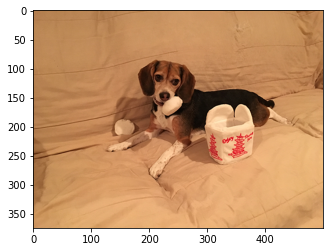

In [35]:
plt.imshow(image_org)

In [36]:
plt.figure(figsize=(50,100))
for i, each in enumerate(os.listdir('output')):
    filepath = './output/' + each
    img=plt.imread(filepath)
    plt.subplot(5, 2, i+1)
    plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.